   ## Decision Trees and Random Forests
## Data Description 

   This data frame contains the following columns:

Kyphosis--a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

Age--in months

Number--the number of vertebrae involved

Start--the number of the first (topmost) vertebra operated on.


## Import Libraries

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [240]:
df = pd.read_csv('kyphosis.csv')


In [241]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA



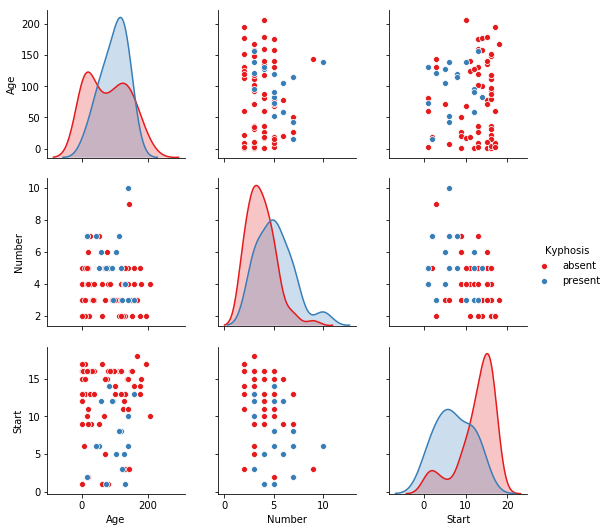

In [242]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
dtree = DecisionTreeClassifier(criterion='gini')  # here criterion used as 'gini' we can use 'entropy'  also.

In [248]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [249]:
predictions = dtree.predict(X_test)
predictions

array(['present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'present', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [250]:
from sklearn.metrics import classification_report,confusion_matrix

In [251]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.90      0.90      0.90        20
     present       0.60      0.60      0.60         5

   micro avg       0.84      0.84      0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [252]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 2  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, it requires you to install the pydot library.

In [253]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

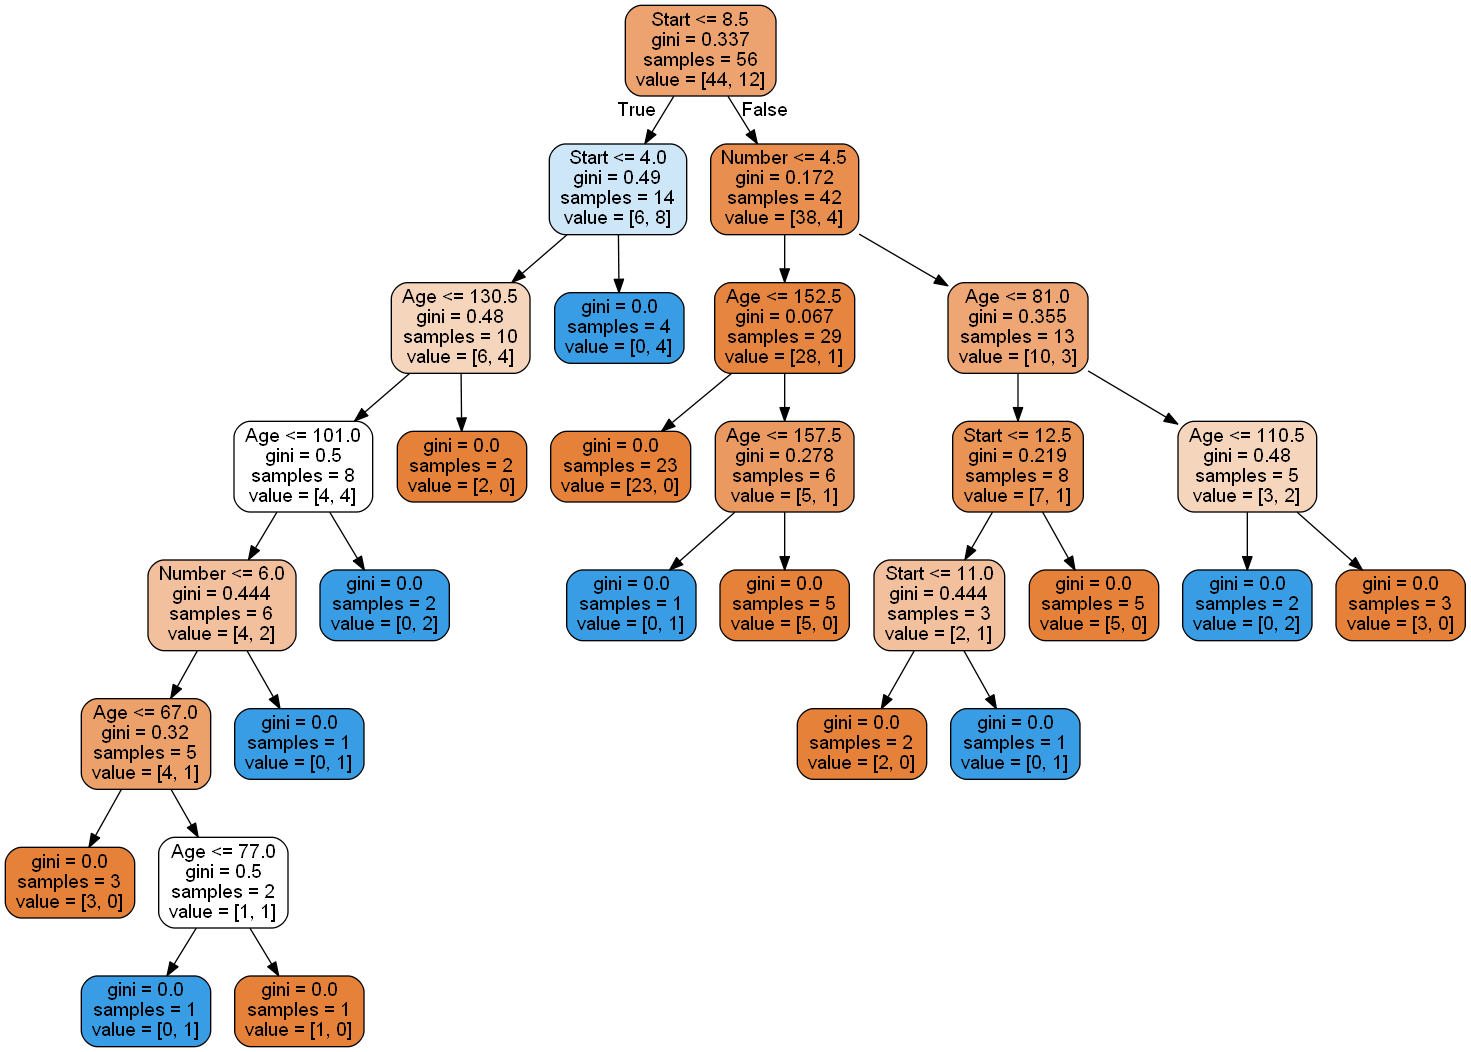

In [254]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [255]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [256]:
rfc_pred = rfc.predict(X_test)

In [257]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 2  3]]


In [258]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      1.00      0.95        20
     present       1.00      0.60      0.75         5

   micro avg       0.92      0.92      0.92        25
   macro avg       0.95      0.80      0.85        25
weighted avg       0.93      0.92      0.91        25



In [259]:
# using random forest we got more accuracy